<h1 style="text-align: center;"><strong>Tareas Cortas - Bloque 1</strong></h1>


<ul>
<li><strong>Curso:</strong> CE5201: Procesamiento y An&aacute;lisis de Im&aacute;genes Digitales</li>
<li><strong>Estudiante:</strong> Luis Felipe Vargas Jimenez</li>
<li><strong>Carnet:</strong> 2020211831<br /><br /></li>
<li><strong>Pregunta:</strong> 1<br /><br /></li>
</ul>

<p><strong>Pregunta 1:</strong> Enunciado...</p>

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


{}
<class 'PIL.JpegImagePlugin.JpegImageFile'>


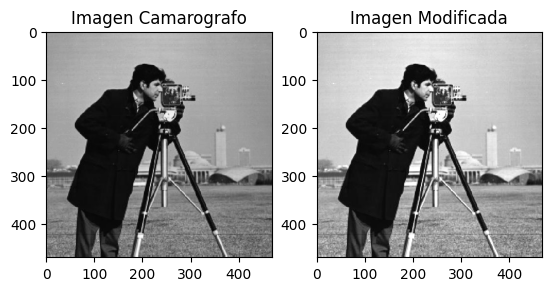

In [3]:

# Cargar la imagen
A = Image.open('Camarografo.jpg')

# Información de la imagen
info = A.info
print(info)

# Tipo de formato
print(type(A))  # En Python, esto dará <class 'PIL.JpegImagePlugin.JpegImageFile'> para una imagen JPEG

# Guardar imagen en otro formato
A.save('camarografoBMP.bmp')

# Mostrar la imagen original
plt.subplot(1, 2, 1)
plt.imshow(A, cmap='gray' if A.mode == 'L' else None)  # Usar cmap='gray' si la imagen es en blanco y negro
plt.title('Imagen Camarografo')

# Operaciones básicas con imágenes
B = np.array(A, dtype=np.int16) + 50  # Convertimos a int16 para evitar overflow
B = np.clip(B, 0, 255)  # Asegurarse de que los valores de los píxeles estén en el rango válido
B = Image.fromarray(B.astype('uint8'))  # Convertimos de vuelta a uint8

# Mostrar la imagen modificada
plt.subplot(1, 2, 2)
plt.imshow(B, cmap='gray' if B.mode == 'L' else None)  # Usar cmap='gray' si la imagen es en blanco y negro
plt.title('Imagen Modificada')

# Mostrar ambas imágenes
plt.show()


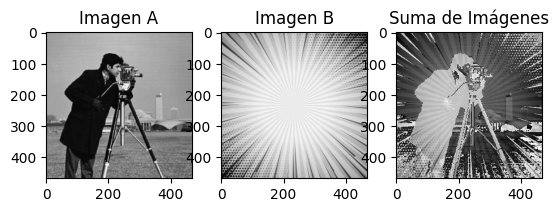

In [6]:

# Cargar las imágenes en modo de escala de grises (L para 8-bit pixels, black and white)
A = Image.open('camarografo.jpg').convert('L')
B = Image.open('fondo.jpg').convert('L')

# Sumar imágenes
plt.subplot(1, 3, 1)
plt.imshow(A, cmap='gray')
plt.title('Imagen A')

plt.subplot(1, 3, 2)
plt.imshow(B, cmap='gray')
plt.title('Imagen B')

# Convertir imágenes a arrays NumPy para la suma
A_array = np.array(A)
B_array = np.array(B)

# Asegurar que las imágenes tengan el mismo tamaño
if A_array.shape == B_array.shape:
    sum_image = A_array + B_array
    sum_image = np.clip(sum_image, 0, 255)  
    sum_image = Image.fromarray(sum_image.astype('uint8'))

    plt.subplot(1, 3, 3)
    plt.imshow(sum_image, cmap='gray')
    plt.title('Suma de Imágenes')
else:
    print("Las imágenes no tienen el mismo tamaño y no pueden sumarse directamente.")

plt.show()


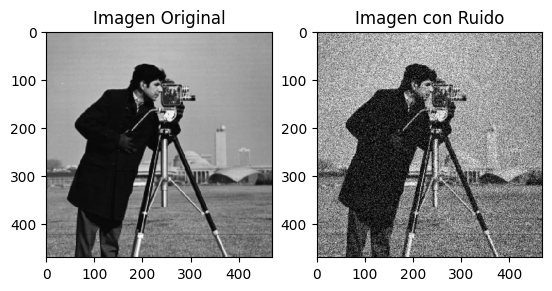

In [15]:


# Cargar la imagen
A = np.array(Image.open('camarografo.jpg'))

# Verificar si la imagen es en escala de grises o en color
if len(A.shape) == 2:  # Imagen en blanco y negro
    m, n = A.shape
    N = 0.2 * np.random.randn(m, n)  # Generar ruido para una imagen en escala de grises
else:  # Imagen en color
    m, n, c = A.shape
    N = 0.2 * np.random.randn(m, n, c)  # Generar ruido para cada canal

# Normalizar la imagen
An = A.astype(np.float64) / 255.0

# Sumar el ruido
B = An + N

# Mostrar la imagen original
plt.subplot(1, 2, 1)
plt.imshow(A, cmap='gray' if len(A.shape) == 2 else None)
plt.title('Imagen Original')

# Convertir la imagen resultante de nuevo a 8 bits
C = np.clip(B * 255, 0, 255).astype(np.uint8)

# Mostrar la imagen con ruido
plt.subplot(1, 2, 2)
plt.imshow(C, cmap='gray' if len(C.shape) == 2 else None)
plt.title('Imagen con Ruido')

# Guardar la imagen con ruido
Image.fromarray(C).save('imagen_ruido.jpg')

# Mostrar ambas imágenes
plt.show()


In [24]:

# Cargar la imagen
A = np.array(Image.open('bote.jpg'))

# Seleccionar una porción de la imagen
Ab = A[0:5, 0:5]  # En formato de 8 bits

# Cambiar de formato a double
A1 = Ab.astype(np.float64)

# Cambiar a formato double y normalizar
A2 = Ab.astype(np.float64) / 255.0

# Desnormalizar y convertir a formato de 8 bits
A3 = np.clip(A2 * 255, 0, 255).astype(np.uint8)

# Nota: Cuando se hacen operaciones matemáticas, se recomienda
#convertir a la imagen usando el formato np.float64